# Оглавление
   [Определение перспективного тарифа для телеком компании. Введение](#шаг-0)
   
1. [Шаг 1. Загрузка файла с данными и изучение общей информации](#шаг-1)

2. [Шаг 2. Подготовка данных](#шаг-2)

3. [Шаг 3. Исследовательский анализ данных](#шаг-3)

    3.1. [Количество игр за исследуемый период](#шаг-3-1)
    
    3.2. [Анализ игр для различных платформ](#шаг-3-2)
    
    3.3. [Анализ распределения игр по жанрам](#шаг-3-3)
    
    3.4. [Анализ продаж в зависимости от отзывов на базе популярной платформы](#шаг-3-4)
    
4. [Шаг 4. Составление портрета пользователя](#шаг-4)

    4.1. [Самые популярные платформы (топ-5) для пользователя каждого региона](#шаг-4-1)
    
    4.2. [Самые популярные жанры (топ-5) для пользователя каждого региона](#шаг-4-2)
    
    4.3. [Влияние рейтинга ESRB на продажи в регионах](#шаг-4-3)

5. [Шаг 5. Проверка гипотез](#шаг-5)

    5.1. [Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#шаг-5-1)
    
    5.2. [Гипотеза: Средние пользовательские рейтинги жанров Action  и Sports  разные](#шаг-5-2) 
    
6. [Шаг 6. Общие выводы](#шаг-6)

7. [Рекомендации](#шаг-7)


# Определение закономерностей для определения успешности компьютерных игр. Введение <a name="шаг-0"></a>

**Целью** данного исследования является определение закономерностей, определяющих успешность компьютерных игр для оценки потенциально популярных продуктов и планирования рекламных кампаний.


**Заказчик исследования:** международный интернет-магазин по продаже компьютерных игр "Стримчик"

**Задачи исследования:**  

Для анализы предоставлен массив данных, включающий в себя:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
 


# Шаг 1. Загрузка файла с данными и изучение общей информации <a name="шаг-1"></a>

In [142]:
import pandas as pd #загружаем все необходимые библиотеки
import numpy as np
import random
import math as mt
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import norm

df = pd.read_csv(r'C:\Users\Larissa Olifirova\Desktop\Яндекс практикум\сборный проект 1\games.csv') #загружаем таблицу

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [144]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6859,LEGO The Hobbit,3DS,2014.0,Action,0.10,0.12,0.00,0.02,NaN,NaN,NaN
3175,LEGO Star Wars II: The Original Trilogy,X360,2006.0,Action,0.55,0.03,0.00,0.05,81.0,8,E10+
6814,NBA Live 10,PSP,2009.0,Sports,0.21,0.00,0.01,0.02,64.0,4.2,E
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
4529,Petz Bunnyz,DS,2008.0,Simulation,0.39,0.01,0.00,0.03,NaN,tbd,E
2566,Killzone: Mercenary,PSV,2013.0,Shooter,0.20,0.39,0.04,0.17,78.0,8.9,M
11289,Ski-Doo Snowmobile Challenge,Wii,2009.0,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E
1060,BioShock Infinite,PS3,2013.0,Shooter,0.72,0.65,0.04,0.28,94.0,8.5,M
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
10915,ESPN NBA 2Night,PS2,2000.0,Sports,0.05,0.04,0.00,0.01,62.0,tbd,E


In [145]:
df.isna().sum() #оценим, сколько пропущенных значений в исследуемом датафрейме

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [146]:
df.duplicated().sum() #проверка на наличие дублей строк

0

In [147]:
df['Name'].value_counts(dropna=False) #оценим, сколько уникальных имён содержит столбец name

Need for Speed: Most Wanted                              12
LEGO Marvel Super Heroes                                  9
Ratatouille                                               9
FIFA 14                                                   9
Madden NFL 07                                             9
                                                         ..
Rozen Maiden: Duellwalzer                                 1
Mario Power Tennis                                        1
Aquanaut's Holiday: Kakusareta Kiroku                     1
Uta no * Prince-Sama: Sweet Serenade                      1
Summon Night Craft Sword Monogatari: Hajimari no Ishi     1
Name: Name, Length: 11560, dtype: int64

11560 уникальных названий и 2 пропущенные строки.

In [148]:
df['Platform'].value_counts(dropna=False) #оценим, количество уникальных платформ 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

31 уникальная платформа. Строки без пропусков. 

In [149]:
df['Genre'].value_counts(dropna=False) #оценим, количество уникальных жанров

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

12 уникальных жанров и 2 строки с пропущенными значениями.

Далее оценим колонки с описанием рейтингов:

In [150]:
df['Critic_Score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
13.0       1
17.0       1
22.0       1
21.0       1
Name: Critic_Score, Length: 83, dtype: int64

8578 пропущенных значений. Баллы проставлены по 100-балльной системе.

In [151]:
df['User_Score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.7       2
0.3       2
0.5       2
9.7       1
0         1
Name: User_Score, Length: 97, dtype: int64

Большое число пропущенных -  6701,  а также строк, где баллы ещё не присвоены: tbd (To Be Determined) - 2424

In [152]:
df['Rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Рейтинги необходимо расшифровать для лучшего восприятия. 6766 значений пропущено.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Выводы

- В базе данных 16715 строк, 11 столбцов. Требуется приведение к единому (нижнему) регистру наименований столбцов.
- Количество уникальных наименований  - 11559. Количество уникальных жанров - 12. 
- Даты в Year_of_Release, указанные в формате object, возможно, следует привести к типу datetime или к целочисленному типу, поскольку месяцы не указаны. Также необходимо приведение типа данных к float из object  в столбцах User_Score. 
- User_Score содержит некие значения tbd в количестве 2424.
- Грубых дубликатов не обнаружено. 
- Данные о продажах в млн. проданных копий указаны максимально полно.
- Оценки критиков и рейтинги содержат большое число пропусков. Также есть пропуски в столбце года выхода релиза - Year_of_Release. По два пропуска содержится в данных столбцов Name и Genre, эти строки можно удалить.
- Необходимо исследовать описание по столбцу Rating, для этого используем информацию сайта https://www.esrb.org/ratings-guide

# Шаг 2. Подготовка данных <a name="шаг-2"></a>

In [154]:
df.columns = [col.lower() for col in df.columns] #используем list comprehansion для изменения регистра в названиях столбцов

In [155]:
df.isna().sum() #оценим количество пропущеннных значений по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [156]:
df.dropna(subset=['name'], inplace=True) #удаляем строки без названия - они не имеют смысла

В year_of_release пропущено 269 значений, и, как можно заметить, для некоторых релизов даты присутствуют в наименовании. 
Извлечём цифры из столбца name и заполним этими значениями пропуски:

In [157]:
df['year'] =  df['name'].str.extract("(\d\d\d\d)", expand=True)

In [158]:
df['year_of_release'] = df['year_of_release'].fillna(df['year'])

Приём сработал только для 17 значений. Заменим оставшиеся пропуски на 2021 год. Переведём столбец с годами релизов в формат целых чисел, смысла переводить в даты нет:

In [159]:
df['year_of_release'] = df['year_of_release'].fillna(2021)
df['year_of_release'] = df['year_of_release'].astype('int')

Столбец rating содержит некий набор букв и цифр. Согласно  Entertainment Software Rating Board эти обозначения дают представление о целевой аудитории пользователей. Следует сделать аббревиатуру более понятной. Для этого создаём функцию с условиями и заполняем новый столбец:

In [160]:
def rating(row):
    if row['rating'] == 'E':
        return 'everyone'
    elif row['rating'] == 'T':
        return 'teen 13-19'
    elif row['rating'] == 'M':
        return 'mature 17+'
    elif row['rating'] == 'E10+':
        return 'everyone 10+'
    elif row['rating'] == 'EC':
        return 'early childhood'
    elif row['rating'] == 'RP':
        return 'rating pending'
    elif row['rating'] == 'K-A':
        return 'kids to adults'
    elif row['rating'] == 'AO':
        return 'adult only 18+'
    else:
        return 'unknown'

df['rating_description'] = df.apply(rating, axis=1) #создаём столбец

В столбце critic_score содержатся 8578 NaN. 

In [161]:
df['critic_score'].min()

13.0

In [162]:
df['critic_score'].max()

98.0

Рейтинг critic_score варьируется от 13 до 98. Присвоим пропущенным значениям 1. 

In [163]:
#df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')  #прежде меняем тип даннных в critic_score на float

In [164]:
df['critic_score'] = df['critic_score'].fillna(1)

В user_score содержится 6699 пропущенных значений NaN. Рейтинг в user_score фиксируется в интрвале 0-10,  поэтому заменим пропущенные значения числом, явно отличающимся от интервальных чисел, например, 100. Но помимо пропущенных строк  в user_score есть неинформативные записи (2424 строки), содержащие tbd (to be determined).

In [165]:
df.query('user_score == "tbd"').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,rating_description
5015,Dora The Explorer: Dora Saves the Snow Princess,PS2,2008,Platform,0.19,0.15,0.0,0.05,1.0,tbd,E,NaN,everyone
5912,Finding Nemo: The Continuing Adventures,GBA,2004,Action,0.21,0.08,0.0,0.01,1.0,tbd,E,NaN,everyone
11824,World Party Games,Wii,2009,Misc,0.07,0.00,0.0,0.01,1.0,tbd,E,NaN,everyone
7311,Petz Rescue: Wildlife Vet,Wii,2008,Simulation,0.20,0.00,0.0,0.02,1.0,tbd,E,NaN,everyone
14625,Harley-Davidson: Road Trip,Wii,2010,Racing,0.03,0.00,0.0,0.00,1.0,tbd,E,NaN,everyone
6966,Cabela's Big Game Hunter 2012,PS3,2011,Sports,0.17,0.03,0.0,0.03,1.0,tbd,T,2012,teen 13-19
13257,World Series of Poker,GC,2005,Misc,0.04,0.01,0.0,0.00,44.0,tbd,E10+,NaN,everyone 10+
5436,Iron Man 2,DS,2010,Action,0.14,0.16,0.0,0.03,54.0,tbd,E10+,NaN,everyone 10+
14813,Frogger: Ancient Shadow,XB,2005,Platform,0.02,0.01,0.0,0.00,47.0,tbd,E,NaN,everyone
9529,Rock Band Track Pack Volume 1,PS2,2008,Misc,0.06,0.05,0.0,0.02,1.0,tbd,T,NaN,teen 13-19


Значения tbd представляют собой некорректный рейтинг или рейтинг требующий уточнения.  Анализ sample показывает, что если отсутствует рейтинг по  user_score, то он отсутствует и по critic_score. Но в строках user_score где записан tbd, как правило  рейтинг по critic_score указан. 
Поэтому tbd в user_score  можно заменить опираясь на рейтинги в critic_score, если между показателями наблюдается зависимость.  Проверим корреляцию:

In [166]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  #прежде меняем тип даннных в user_score на float

In [167]:
df.query('critic_score != "NaN" and critic_score >1 and user_score != "tbd" and user_score != "NaN" and user_score <100').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.025766,0.027958,-0.047049,0.029144,-0.015895,-0.238199
na_sales,-0.025766,1.000000,0.839998,0.467134,0.727141,0.233367,0.086496
eu_sales,0.027958,0.839998,1.000000,0.518734,0.716482,0.212023,0.055573
jp_sales,-0.047049,0.467134,0.518734,1.000000,0.394249,0.146175,0.127103
other_sales,0.029144,0.727141,0.716482,0.394249,1.000000,0.191105,0.057359
critic_score,-0.015895,0.233367,0.212023,0.146175,0.191105,1.000000,0.580878
user_score,-0.238199,0.086496,0.055573,0.127103,0.057359,0.580878,1.000000


Между critic_score и user_score есть определённая зависимость (0,58), но заполнение значений tbd на основании рейтингов critic_score будет некорректным,  поэтому заменим все tbd на условное значение 100, как и все NaN:

In [168]:
df['user_score'] = df['user_score'].fillna(100) #меняем пропуски на 100

In [169]:
df['user_score'] = df['user_score'].replace('tbd', 100)

In [170]:
df['user_score'].value_counts(dropna=False)

100.0    9123
7.8       324
8.0       290
8.2       282
8.3       254
         ... 
2.3         2
1.9         2
0.2         2
0.0         1
9.7         1
Name: user_score, Length: 96, dtype: int64

Удалим ненужные теперь столбцы:

In [171]:
df= df.drop(['rating',  'year'], 1)

Посчитаем суммарные продажи  во всех регионах и запишем их в отдельный столбец.

In [172]:
df['sales_total'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16713 non-null  object 
 1   platform            16713 non-null  object 
 2   year_of_release     16713 non-null  int32  
 3   genre               16713 non-null  object 
 4   na_sales            16713 non-null  float64
 5   eu_sales            16713 non-null  float64
 6   jp_sales            16713 non-null  float64
 7   other_sales         16713 non-null  float64
 8   critic_score        16713 non-null  float64
 9   user_score          16713 non-null  float64
 10  rating_description  16713 non-null  object 
 11  sales_total         16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Данные готовы  к работе.

## Выводы
- Названия колонок были приведены к нижнему регистру.
- Столбцы name  и genre содержали по 2 пропущенных значения (строки совпадали), которые были удалены.
- Даты в столбце year_of_release содержали 269 пропусков из которых только 17 удалось заменить на годы, указанные в наименовании игры. Все прочие пропуски были заменены на 2021 год. Формат столбца изменён на целочисленный тип. 
- Для столбца rating с неинформативной в текущем виде маркировкой целевой аудитории от Entertainment Software Rating Board были созданы новые значения с использованием функции.
- Пропущенные значения по рейтингу critic_score (варьируются от 13 до 98), были присвоены 1.
- Пропущенные значения по пользовательскому рейтингу user_score с интервалом 0-10 изменены на 100. Также на 100 были заменеы строки, содержащие  tbd (рейтинг требующий уточнения). Для замены tbd был рассмотрен вариант значений рейтинга критиков critic_score, однако  между показателями была определена невысокая корреляция (0,58) и такой вариант замены был отвергнут.
- Тип данных user_score был изменён на float, т.к. данные содержат значения после запятой.
- Лишние столбцы rating и year удалены.
- Создан столбец sales_total с суммами продаж по всем регионам.

# Шаг 3. Исследовательский анализ данных <a name="шаг-3"></a>

## 3.1. Количество игр за исследуемый период <a name="шаг-3-1"></a>

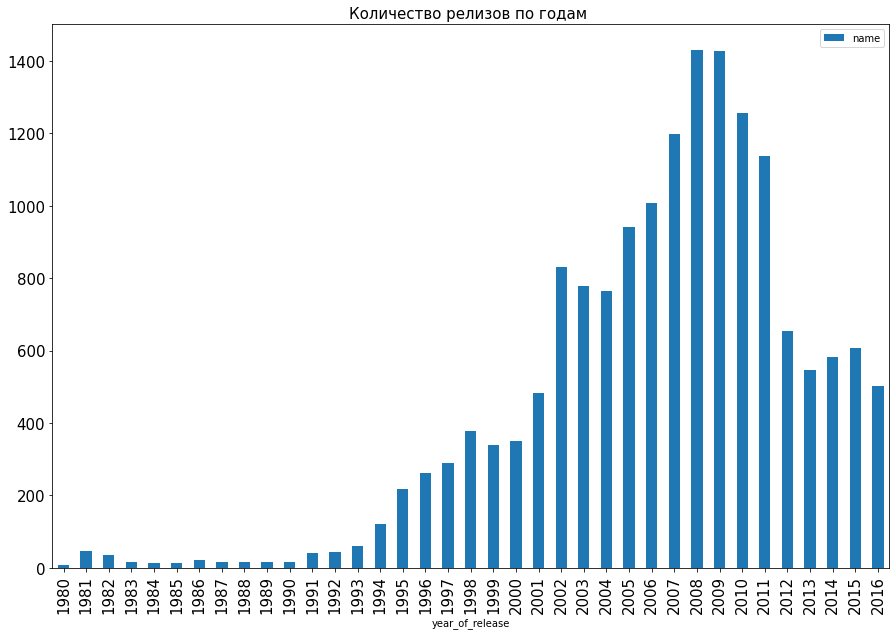

In [174]:
df.query('year_of_release !=2021').pivot_table(index='year_of_release', values=['name'], aggfunc='count').sort_values(by='year_of_release', ascending=True).plot(kind='bar',figsize=(15, 10), fontsize=15)
plt.title('Количество релизов по годам ', fontsize=15);

2008 и 2009 годы являются пиковыми по количеству выпущенных игр в исследуемом промежутке.

Количество релизов за 1980-1993 годы минимально. Основываясь на правиле Трёх Сигм проверим, можем ли мы устранить эти данные из анализа:

In [175]:
three_sigma_years = df.query('year_of_release != 2021').groupby('year_of_release')['name'].agg('count').reset_index()

In [176]:
three_sigma_years['name'].describe()

count      37.000000
mean      444.891892
std       452.155073
min         9.000000
25%        36.000000
50%       338.000000
75%       764.000000
max      1429.000000
Name: name, dtype: float64

In [177]:
a=three_sigma_years['name']

In [178]:
a = a[~((a-a.mean()).abs() > 3*a.std())] 

In [179]:
a.describe()

count      37.000000
mean      444.891892
std       452.155073
min         9.000000
25%        36.000000
50%       338.000000
75%       764.000000
max      1429.000000
Name: name, dtype: float64

Правило Трёх Сигм позволяет исключать данные о релизах до 1990 года. 
Эту же ситуацию описывает таблица (2006.751490 - 5.351147 - 5.351147 -5.351147 = 1990.698 и 2006.751490 + 5.351147 + 5.351147 + 5.351147 = 2022.805):

In [180]:
three_sigma_years.describe()

,year_of_release,name
count,37.000000,37.000000
mean,1998.000000,444.891892
std,10.824355,452.155073
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,764.000000
max,2016.000000,1429.000000


In [181]:
624.615385 + 425.862051 +425.862051+425.862051

1902.201538

In [182]:
624.615385 - 425.862051 -425.862051-425.862051

-652.9707680000001

## 3.2. Анализ игр для различных платформ <a name="шаг-3-1"></a>

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

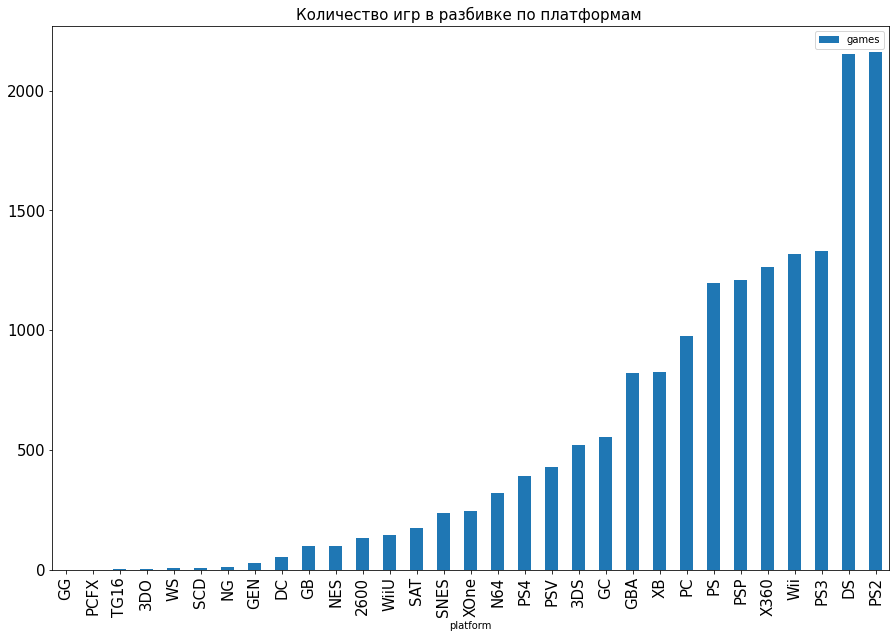

In [183]:
pivot_platform = df.pivot_table(index=['platform'], values='year_of_release', aggfunc='count')  
pivot_platform.columns = ['games']
pivot_platform['games'].map('{:.1f}'.format).reset_index()
pivot_platform.sort_values(by='games').plot(kind='bar',figsize=(15, 10), fontsize=15)
plt.title('Количество игр в разбивке по платформам ', fontsize=15);

Наиболее популярны игры для платформ Nintendo DS (DS) и PlayStation 2 (PS, PS2, PS3, GBA, PC,  )

In [184]:
platform = df.pivot_table(index='platform', values='sales_total', aggfunc='sum')\
.sort_values(by='sales_total', ascending=False).reset_index()
top_platforms = platform.loc[0:9]

In [185]:
top_platforms

,platform,sales_total
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [188]:
other_platforms = platform.loc[9:30]
#создаём столбец и формируем отдельную позицию Прочие

In [190]:
df['other_platforms'] = df['platform']!=top_platforms

ValueError: Wrong number of items passed 16715, placement implies 1

In [ ]:
top = df.pivot_table(index='year_of_release', columns='top_platforms', values='sales_total', aggfunc='sum')\
.query('year_of_release <2015 and year_of_release > 2005')
#убираем неполный 2016 год из графика
top.plot(figsize=(20, 7), grid=True)
plt.title('Динамика продаж по топовым по платформам, млн.копий ', fontsize=15);

## 3.3. Анализ распределения игр по жанрам <a name="шаг-3-3"></a>

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

овые  составляет 10,41%, также p-значение выше заданного значения alpha:
 

## 3.4. Анализ продаж в зависимости от отзывов на базе популярной платформы <a name="шаг-3-4"></a>
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.


Проверим корреляцию между оценками пользователей и критиков и другими значениями:

In [ ]:
df.query('user_score <= 10 and critic_score >=13').corr()

In [ ]:
df.query('name == "Elite: Dangerous"')

Столбцы с рейтингами пользователей и критиков  содержат большое число пропусков. Посмотрим, как распределены эти пропуски:

In [ ]:
df.pivot_table(index='year_of_release', values=['critic_score', 'user_score'], aggfunc='sum').plot();

In [ ]:
df.pivot_table(index='genre', values=['critic_score', 'user_score'], aggfunc='sum').plot(figsize=(15,5));

# Шаг 4. Составление портрета пользователя <a name="шаг-4"></a>

## 4.1. Самые популярные платформы (топ-5) для пользователя каждого региона <a name="шаг-4-1"></a>

Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

## 4.2. Самые популярные жанры (топ-5) для пользователя каждого региона <a name="шаг-4-2"></a>

Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.
 

## 4.3. Влияние рейтинга ESRB на продажи в регионах <a name="шаг-4-3"></a>

Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

# Шаг 5. Проверка гипотез <a name="шаг-5"></a>

## 5.1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a name="шаг-5-1"></a>

Сформулируем гипотезы:

- H0 - нулевая гипотеза: выручка пользователей тарифов Смарт и Ультра **не различается**
- H1 - альтернативная гипотеза: выручка пользователей тарифов Смарт и Ультра **различается**

Для проверки данных гипотез проведём статистический тест и расчитаем покзатель значение вероятности (p-value) с учетом заданного показтеля критического уровня статистической значимости alpha. Пороговое значение альфа зададим в размере 5%. 

Если p-value окажется меньше alpha - отвергнем гипотезу.


## 5.2. Гипотеза: Средние пользовательские рейтинги жанров Action  и Sports  разные <a name="шаг-5-2"></a>

Сформулируем гипотезы:

- H0 - нулевая гипотеза: выручка пользователей тарифов Смарт и Ультра **не различается**
- H1 - альтернативная гипотеза: выручка пользователей тарифов Смарт и Ультра **различается**

Для проверки данных гипотез проведём статистический тест и расчитаем покзатель значение вероятности (p-value) с учетом заданного показтеля критического уровня статистической значимости alpha. Пороговое значение альфа зададим в размере 5%. 

Если p-value окажется меньше alpha - отвергнем гипотезу.


### Вывод
-  

# Шаг 6. Общие выводы <a name="шаг-6"></a>

В целом 


# Рекомендации <a name="шаг-7"></a>


